In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

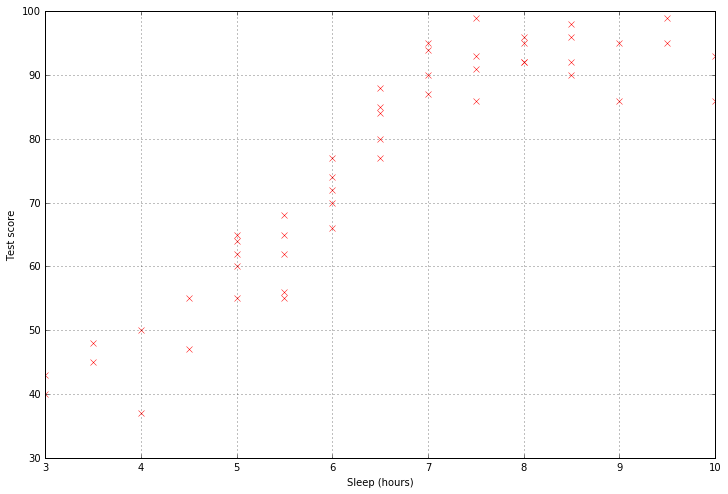

In [4]:
data = np.loadtxt('data.csv', delimiter=',')

x = data[:,0]
y = data[:,1]

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax.plot(x, y, 'x', linewidth=4, color='red')
ax.set_xlabel('Sleep (hours)')
ax.set_ylabel('Test score')

ax.grid()

plt.show()
